In [3]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load Data Set
(X_train, y_train), (X_test, y_test) = mnist.load_data()




In [26]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Neural Network
model = Sequential()  

# Add a Conv2D layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Optional: Add MaxPooling layer to reduce spatial size and computation
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

# Optional: Add MaxPooling layer to reduce spatial size and computation
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the Conv2D layer before feeding it to Dense layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(64, activation='relu'))                        
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary to verify shapes
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.8759 - loss: 0.8860 - val_accuracy: 0.9775 - val_loss: 0.0718
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9793 - loss: 0.0671 - val_accuracy: 0.9820 - val_loss: 0.0598
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9849 - loss: 0.0477 - val_accuracy: 0.9823 - val_loss: 0.0601
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9894 - loss: 0.0334 - val_accuracy: 0.9834 - val_loss: 0.0626
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9897 - loss: 0.0316 - val_accuracy: 0.9850 - val_loss: 0.0518
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9917 - loss: 0.0279 - val_accuracy: 0.9878 - val_loss: 0.0445
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9923 - loss: 0.0245 - val_accuracy: 0.9861 - val_loss: 0.0587
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9928 -

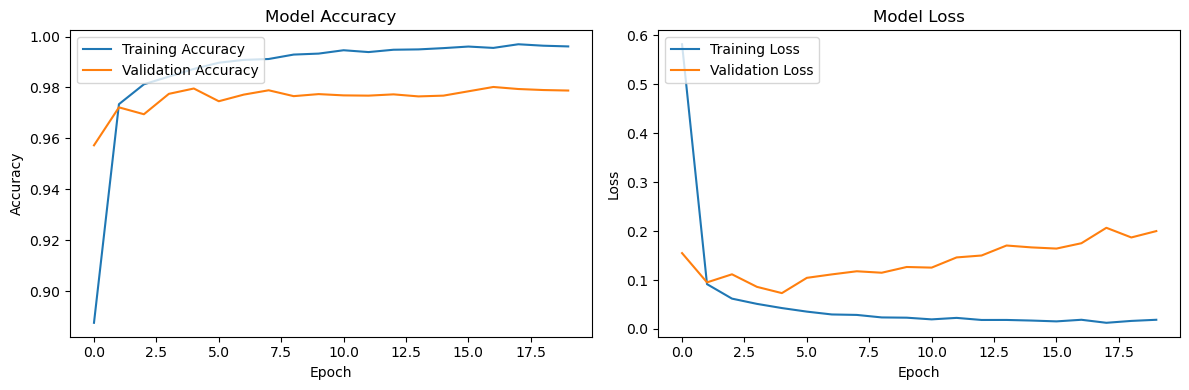

In [24]:
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by `model.fit`
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [25]:
# #Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Accuracy : {test_accuracy * 100:.2f}")
print(f"Lost : {test_loss}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9764 - loss: 0.2207
Accuracy : 97.88
Lost : 0.19984155893325806
